In [1]:
from twelvedata import TDClient
import json
import os
import sys
sys.path.append('../')
import src.td_tools as tl

In [2]:
file = open("../td_secret.json")
keys = json.load(file)
td = TDClient(apikey=keys["key"])

In [3]:
company = "AAPL"
interval = "1h"
size = 500
timezone = "America/New_York"

In [4]:
request_df = tl.td_get(sym=company, interval="1h", size=size, timezone=timezone)

In [5]:
request_df.to_csv(r"..\data\appl_1h_500.csv")

In [6]:
request_df

,open,high,low,close,volume
datetime,,,,,
2020-11-27 12:30:00,116.5200,116.6500,116.2200,116.59000,8125868
2020-11-27 11:30:00,117.0400,117.1410,116.3100,116.52000,8668059
2020-11-27 10:30:00,117.2200,117.4850,116.8300,117.03010,10494535
2020-11-27 09:30:00,116.5610,117.3000,116.4700,117.22500,17974686
2020-11-27 08:30:00,116.7700,116.9800,116.3000,116.56000,0
...,...,...,...,...,...
2020-08-19 09:30:00,115.9875,116.8000,115.6525,116.71752,3216649
2020-08-18 15:30:00,115.5500,115.7075,115.4525,115.56250,1284149
2020-08-18 14:30:00,115.9225,115.9675,115.4125,115.57250,496417


In [7]:
def td_quote(sym:str, interval:str, size:int, timezone:str):
    try:
        return td.quote(symbol=sym, 
                              interval=interval,
                              outputsize=size,
                              timezone=timezone).as_pandas() 
    except ValueError:
        print("Check Value Formats")

In [8]:
request2_df = td_quote(sym=company, interval="1h", size=size, timezone=timezone)

AttributeError: 'TDClient' object has no attribute 'quote'

ModuleNotFoundError: No module named 'mplfinance'

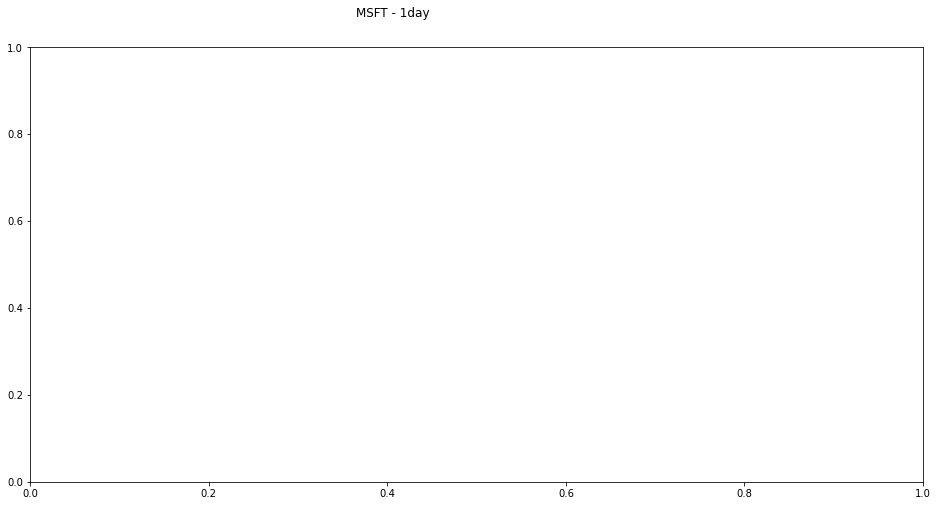

In [7]:
ts = td.time_series(
    symbol="MSFT",
    outputsize=75,
    interval="1day",
)
# 1. Returns OHLCV chart
ts.as_pyplot_figure()

# 2. Returns OHLCV + BBANDS(close, 20, 2, SMA) + %B(close, 20, 2 SMA) + STOCH(14, 3, 3, SMA, SMA)
ts.with_bbands().with_percent_b().with_stoch(slow_k_period=3).as_pyplot_figure()